# NYC crime EDA

In [159]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import geopandas
import geoplot
from shapely.geometry import Polygon, Point

path = 'C:/Users/Zaca/Documents/Datasets/nyc/'

In [8]:
crime = pd.read_csv(path + 'nypd_historic_clean.csv', index_col=0)

C:\Users\Zaca\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [10]:
crime.shape

(5717178, 9)

In [125]:
crime

,date,time,precinct,class_code,description,level,borough,premises,geo
0,2008-04-10,19,73,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,STREET,"(40.669413836, -73.91260308)"
1,2007-06-03,15,28,236,DANGEROUS WEAPONS,MISDEMEANOR,MANHATTAN,STREET,"(40.801978284, -73.945511151)"
2,2010-02-16,20,102,105,ROBBERY,FELONY,QUEENS,GROCERY/BODEGA,"(40.699990268, -73.830977746)"
3,2009-11-10,16,79,341,PETIT LARCENY,MISDEMEANOR,BROOKLYN,FOOD SUPERMARKET,"(40.681004729, -73.955034577)"
5,2011-06-23,20,81,118,DANGEROUS WEAPONS,FELONY,BROOKLYN,STREET,"(40.678337995, -73.925577614)"
...,...,...,...,...,...,...,...,...,...
6847939,2015-08-23,2,75,340,FRAUDS,MISDEMEANOR,BROOKLYN,STREET,"(40.672269995, -73.875569231)"
6847940,2013-06-15,11,32,578,HARRASSMENT 2,VIOLATION,MANHATTAN,RESIDENCE - PUBLIC HOUSING,"(40.829882139, -73.9367581)"
6847941,2012-07-12,14,49,106,FELONY ASSAULT,FELONY,BRONX,STREET,"(40.846592354, -73.852913364)"
6847942,2012-04-15,19,112,341,PETIT LARCENY,MISDEMEANOR,QUEENS,STREET,"(40.728720422, -73.853512684)"


In [153]:
prec = crime[crime.precinct == 75]

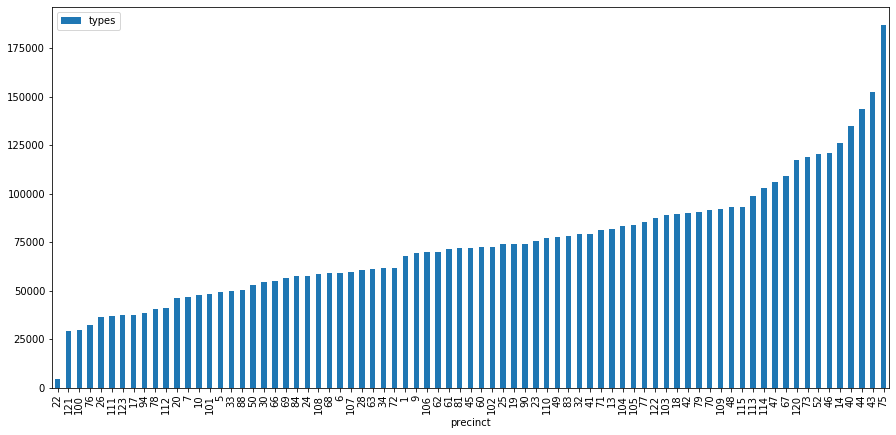

In [132]:
crime.groupby('precinct').agg(types=('level','count')).sort_values('types').plot(kind='bar', figsize=(15, 7))

In [133]:
test = crime[crime.precinct == 75]

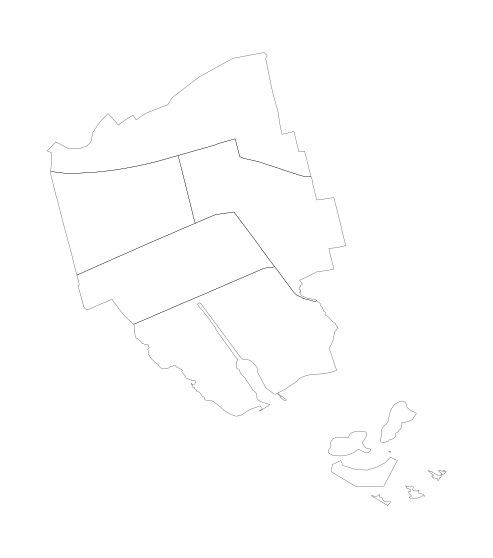

In [152]:
region = geopandas.read_file(path + 'nypd_precincts.shp').to_crs(epsg=4326)

p75 = region[region['pct'] == '075']

In [177]:
coords = [x.replace('(', '').replace(')','').split(', ') for x in test.geo]

hey = []
for c in coords:
    hey += [[float(x) for x in c]]
    

In [185]:
crimes = [Point(y, x) for x, y in hey]

In [184]:
region

,patrol_bor,pct,phase,sct_text,sctr_float,sector,sq_feet,sq_mile_ne,sq_miles,date_start,time_start,geometry
0,PBQS,102,14,102A,0.0,102A,3.927381e+07,1.408754,1.408760,2018-07-09,00:00:00.000,"POLYGON ((-73.84120 40.68335, -73.84125 40.683..."
1,PBQS,102,14,102B,1.0,102B,2.939626e+07,1.054446,1.054450,2018-07-09,00:00:00.000,"POLYGON ((-73.84451 40.68242, -73.84494 40.682..."
2,PBQS,102,14,102C,2.0,102C,2.375686e+07,0.852160,0.852163,2018-07-09,00:00:00.000,"POLYGON ((-73.82611 40.71557, -73.82605 40.715..."
3,PBQS,102,14,102D,3.0,102D,4.088754e+07,1.466639,1.466645,2018-07-09,00:00:00.000,"POLYGON ((-73.83681 40.70844, -73.83694 40.708..."
4,PBQN,104,15,104A,4.0,104A,4.451591e+07,2.194020,1.596795,2018-10-01,00:00:00.000,"POLYGON ((-73.85845 40.70578, -73.85828 40.705..."
...,...,...,...,...,...,...,...,...,...,...,...,...
297,PBBS,061,12,061C,340.0,61C,2.529982e+07,0.907506,0.907510,2018-01-22,00:00:00.000,"POLYGON ((-73.93609 40.60387, -73.93426 40.602..."
298,PBBS,061,12,061D,341.0,61D,4.940196e+07,1.772051,1.772059,2018-01-22,00:00:00.000,"POLYGON ((-73.93183 40.59299, -73.93176 40.592..."
299,PBSI,120,03,120A,336.0,120A,5.166329e+07,1.853165,1.853173,2015-12-14,00:00:00.000,"POLYGON ((-74.08777 40.63172, -74.08773 40.631..."
300,PBSI,120,03,120B,337.0,120B,3.139478e+07,1.126133,1.126137,2015-12-14,00:00:00.000,"POLYGON ((-74.07337 40.63661, -74.07347 40.636..."


In [180]:
crimes

 ...]

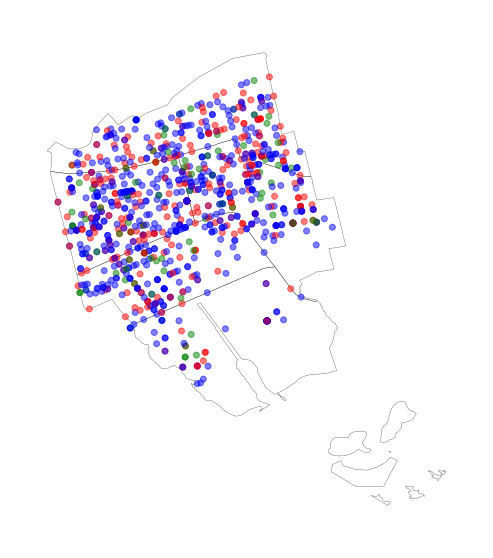

In [196]:
ax = geoplot.polyplot(p75, figsize=(10, 10), lw= 0.25, facecolor= 'none', edgecolor='k', alpha=1);

colorz = test.level.map(color_dict)
xcoords = [p.x for p in crimes]
ycoords = [p.y for p in crimes]
ax.scatter(xcoords[:1000], ycoords[:1000], c=colorz[:1000], alpha=.5) 

In [190]:
color_dict = {'FELONY': 'r', 'MISDEMEANOR': 'b', 'VIOLATION': 'g'}


12         r
57         b
126        r
160        b
206        r
          ..
6847810    b
6847899    b
6847911    r
6847915    b
6847939    b
Name: level, Length: 186852, dtype: object